In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = np.reshape(x_train, (-1,28,28,1))
x_test = np.reshape(x_test, (-1,28,28,1))
x_train.shape, x_test.shape

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [3]:
## data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    validation_split = 0.25
)
datagen.fit(x_train)

In [4]:
## create model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(5,5), filters=10, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=20, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy',
              metrics = ['accuracy']
             )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 20)        1820      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 500)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                25050     
_________________________________________________________________
flatten_1 (Flatten)          (None, 50)                0

In [5]:
train_generator = datagen.flow(x_train, y_train, batch_size = 64, subset = 'training')
val_generator = datagen.flow(x_train, y_train, batch_size = 64, subset = 'validation')

history = model.fit_generator( train_generator,
                               epochs = 30,
                               verbose = 1,
                               validation_data = val_generator
                               )


C:\Users\dlatm\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
704/704 [==============================] - 36s 48ms/step - loss: 3.1472 - accuracy: 0.5432 - val_loss: 0.3428 - val_accuracy: 0.8947
Epoch 2/30
704/704 [==============================] - 28s 39ms/step - loss: 0.2980 - accuracy: 0.9078 - val_loss: 0.2429 - val_accuracy: 0.9283
Epoch 3/30
704/704 [==============================] - 28s 40ms/step - loss: 0.1940 - accuracy: 0.9403 - val_loss: 0.1643 - val_accuracy: 0.9479
Epoch 4/30
704/704 [==============================] - 36s 51ms/step - loss: 0.1555 - accuracy: 0.9512 - val_loss: 0.1380 - val_accuracy: 0.9593
Epoch 5/30
704/704 [==============================] - 33s 46ms/step - loss: 0.1264 - accuracy: 0.9609 - val_loss: 0.1251 - val_accuracy: 0.9618
Epoch 6/30
704/704 [==============================] - 33s 46ms/step - loss: 0.1229 - accuracy: 0.9624 - val_loss: 0.1467 - val_accuracy: 0.9551
Epoch 7/30
704/704 [==============================] - 30s 43ms/step - loss: 0.1108 - accuracy: 0.9670 - val_loss: 0.1261 - val_accuracy:

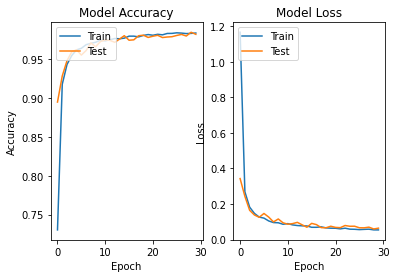

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [7]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'test loss : {loss} / test accuracy : {accuracy}')

313/313 [==============================] - 2s 7ms/step - loss: 0.0296 - accuracy: 0.9906
test loss : 0.029625622555613518 / test accuracy : 0.9905999898910522
